<a href="https://colab.research.google.com/github/i-ninte/data-analytics-R-python/blob/main/uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UBER DATA ANALYSIS

Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL (shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled, time spent on the trip, and demand at the time of the request.

Uber has gained popularity for its convenience, ease of use, and competitive pricing compared to traditional taxi services. It has expanded its operations to numerous cities around the world and has also introduced other services like food delivery (Uber Eats) and package delivery (Uber Connect).

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE DATASET

In [2]:
data= pd.read_csv("uber.csv")

## PREVIEWING THE DATASET

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
data.shape

(1156, 7)

## DATA CLEANING

In [ ]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [3]:
data = data.dropna()

In [ ]:
data.shape

(653, 7)

In [4]:
duplicates= data[data.duplicated()]

In [ ]:
duplicates

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [5]:
data= data.drop_duplicates()

In [ ]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


## EXPLORATION AND ANALYSIS

### CATEGORY ANALYSIS

/tmp/ipykernel_732/1076834810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_counts.index, palette='viridis')


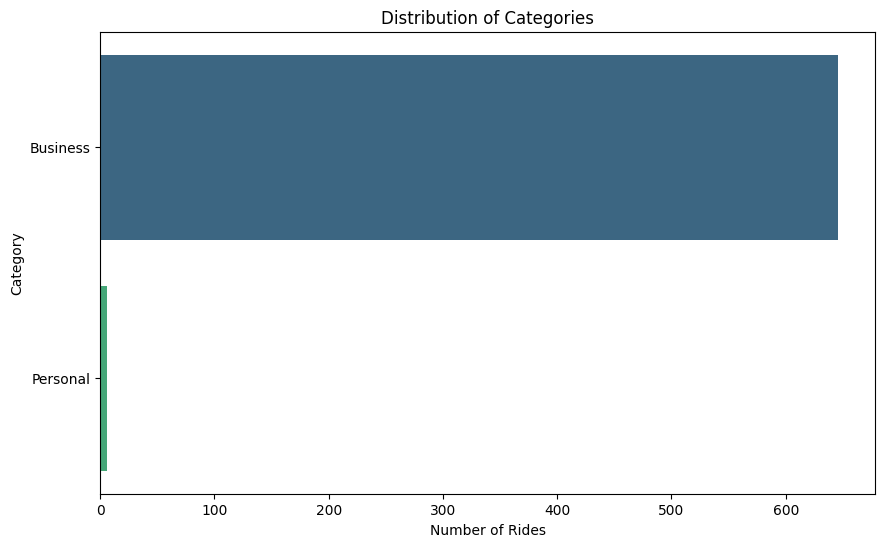

In [ ]:
category_counts = data['CATEGORY'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts, y=category_counts.index, palette='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Number of Rides')
plt.ylabel('Category')
plt.show()

The analysis of ride data indicates a pronounced preference for business-category trips, comprising nearly 99% of the rides, while personal-category rides constitute less than 1%. This underscores a significant reliance on the service for professional purposes. To capitalize on this trend, recommendations include offering tailored business packages, establishing corporate partnerships, emphasizing marketing strategies directed at business users, implementing customized invoicing for efficient expense tracking, and maintaining open communication channels for user feedback. Aligning services with the predominant business usage patterns can enhance the service's appeal to professionals and foster potential corporate collaborations.

## PURPOSE OF THE RIDES

/tmp/ipykernel_732/3364613967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts, y=purpose_counts.index, palette='viridis')


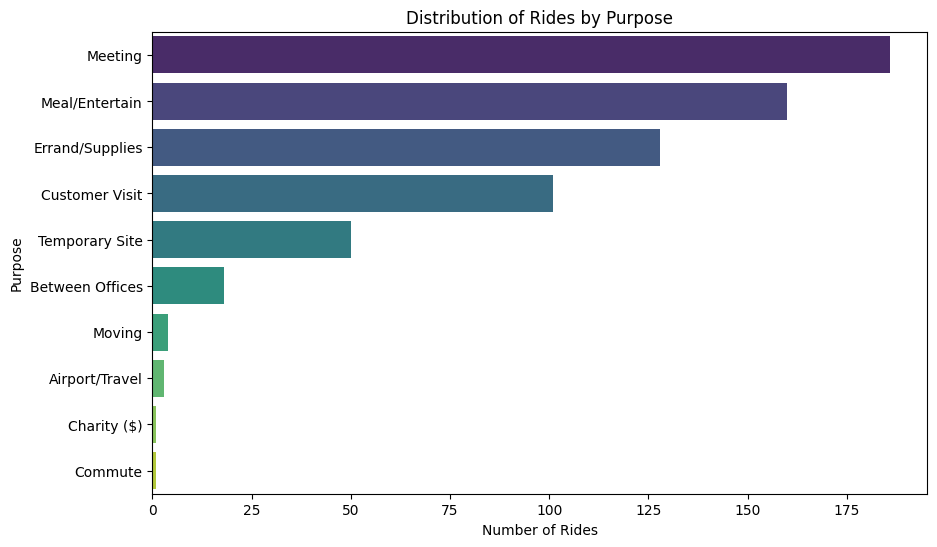

In [ ]:
# Calculate the counts of each purpose
purpose_counts = data['PURPOSE'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts, y=purpose_counts.index, palette='viridis')
plt.title('Distribution of Rides by Purpose')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.show()

The distribution of rides by purpose, as depicted in the above diagram, reveals that the majority of rides serve the purpose of meetings, followed by Meal/Entertain, Errands/Supply, Customer Visit, Temporal Site, Between Offices, Moving, and Airport/Travel. Charity and Commute have the least frequency.

The observed distribution of rides by purpose suggests that business-related activities, such as meetings and meal/entertainment engagements, dominate the usage of rides. This insight could influence resource allocation, such as optimizing transportation services during peak meeting hours. Additionally, considering the lower frequency of rides for purposes like charity and commute, there might be an opportunity to encourage and facilitate ridesharing initiatives for these purposes to enhance efficiency and environmental sustainability. Regularly assessing and adjusting service offerings based on the predominant purposes could lead to a more tailored and efficient transportation service.

<Figure size 1000x600 with 0 Axes>

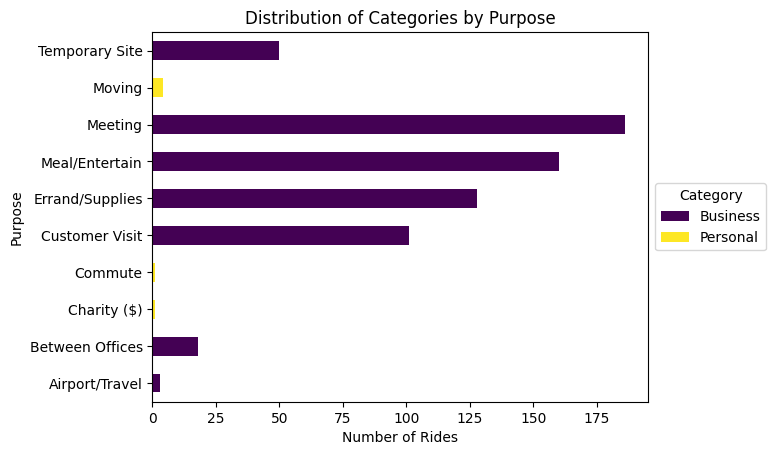

In [ ]:
# Calculate the counts of each category based on 'PURPOSE'
category_counts_by_purpose = data.groupby('PURPOSE')['CATEGORY'].value_counts().unstack()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
category_counts_by_purpose.plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Distribution of Categories by Purpose')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.legend(title='Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The chart above explores the distribution of ride categories by purpose. It reveals that only the purposes of moving, commute, and charity fall under the personal category, while the rest are categorized as business. This classification provides valuable insights into the nature of trips, indicating a clear separation between personal and business-related purposes.


This observation implies a predominant association of the rides with business-related purposes as already explained, as evidenced by the overwhelming majority categorized as such. The limited representation of personal purposes in the provided data suggests a focus on professional activities. To capitalize on this trend, recommendations include optimizing services for business travelers, offering corporate packages, and tailoring marketing efforts towards professionals. Additionally, considering the potential demand for personal rides, exploring strategies to attract and cater to this segment could open up new market opportunities and diversify the user base. Regular feedback collection from users in both categories can provide insights for continuous improvement and customization of services.

## PEAK TIME ANALYSIS

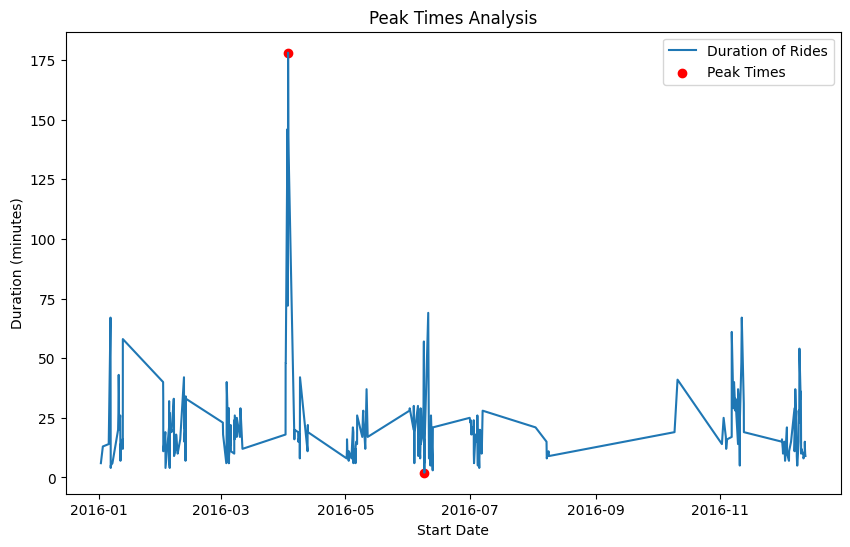

In [ ]:
# Convert 'START_DATE' and 'END_DATE' columns to datetime objects with inferred format
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

data['DURATION'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60

max_peak_time = data.loc[data['DURATION'].idxmax()]['START_DATE']
min_peak_time = data.loc[data['DURATION'].idxmin()]['START_DATE']

plt.figure(figsize=(10, 6))
sns.lineplot(x='START_DATE', y='DURATION', data=data, label='Duration of Rides')
plt.scatter([max_peak_time, min_peak_time], [data['DURATION'].max(), data['DURATION'].min()], color='red', label='Peak Times')
plt.title('Peak Times Analysis')
plt.xlabel('Start Date')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.show()

## WEEKDAYS VS WEEKENDS RIDES

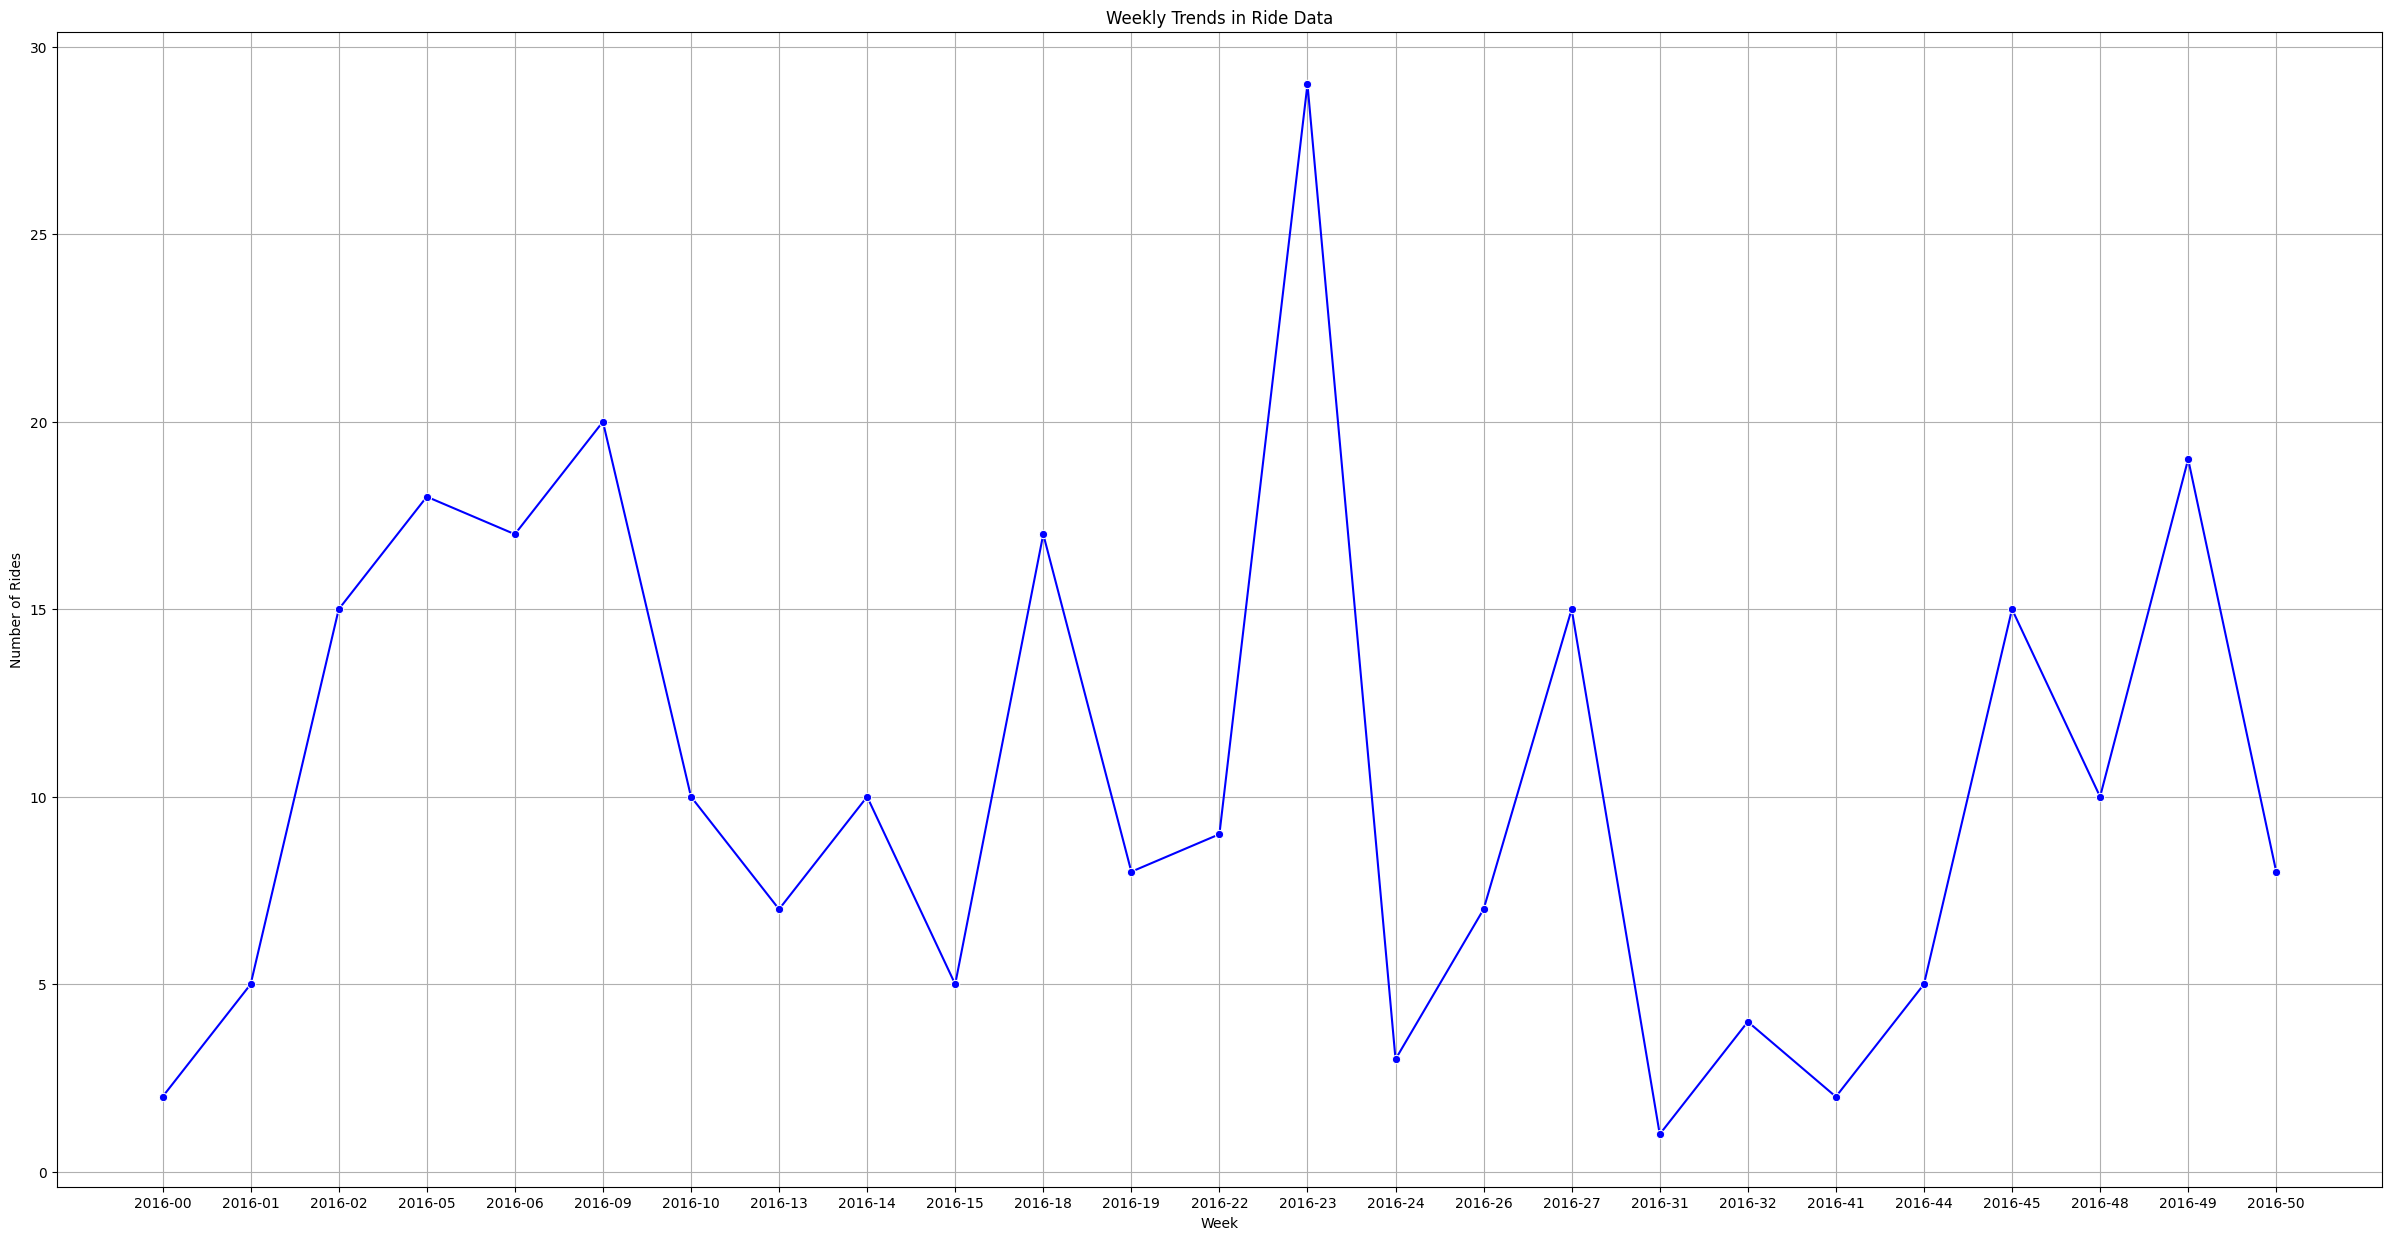

In [ ]:
# Convert 'START_DATE' to datetime and extract the week
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['Week'] = data['START_DATE'].dt.strftime('%Y-%U')

# Calculate the number of rides per week
weekly_rides = data['Week'].value_counts().sort_index()

# Plot the weekly trends
plt.figure(figsize=(30, 15))
sns.lineplot(x=weekly_rides.index, y=weekly_rides.values, marker='o', color='blue')
plt.title('Weekly Trends in Ride Data')
plt.xlabel('Week')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

The chart illustrates fluctuations in the number of rides throughout the year. Notably, there was a surge from the first to the fifth week, followed by a slight decline in week 6. Subsequently, rides increased until the 9th week, experiencing a gradual decrease in week 10. The downward trend continued until week 13, with a minor upturn in week 14 before dropping in week 15, nearly equaling the count in the first week. A sharp rise occurred from week 15 to 18, abruptly dropping in week 19. A slight increase transpired in week 22, reaching the peak in week 23, followed by a sudden decline. The subsequent weeks, starting from 24, witnessed a gradual increase until week 31, which marked the lowest ride count. Weeks 31 to 32 showed a slight rise, with a minor dip in week 41. Weeks 41 to 45 exhibited a gradual increase, followed by a slight decrease from 45 to 48. The period from 48 to 49 saw a gradual rise, while rides decreased from week 49 to week 50.

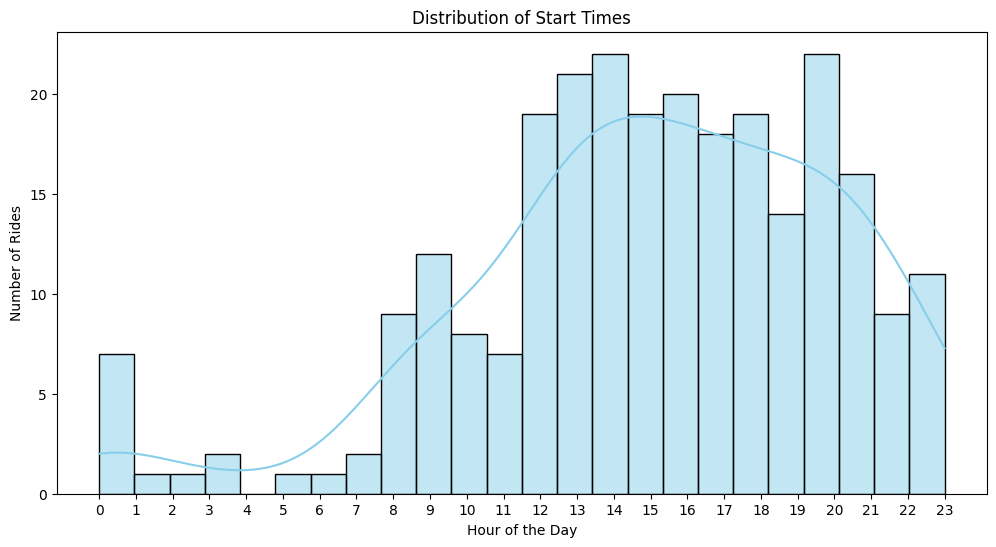

In [ ]:
# Convert 'START_DATE' to datetime
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Extract the hour from the start time
data['Hour'] = data['START_DATE'].dt.hour

# Plot the distribution of start times
plt.figure(figsize=(12, 6))
sns.histplot(data['Hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Start Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(24))
plt.show()

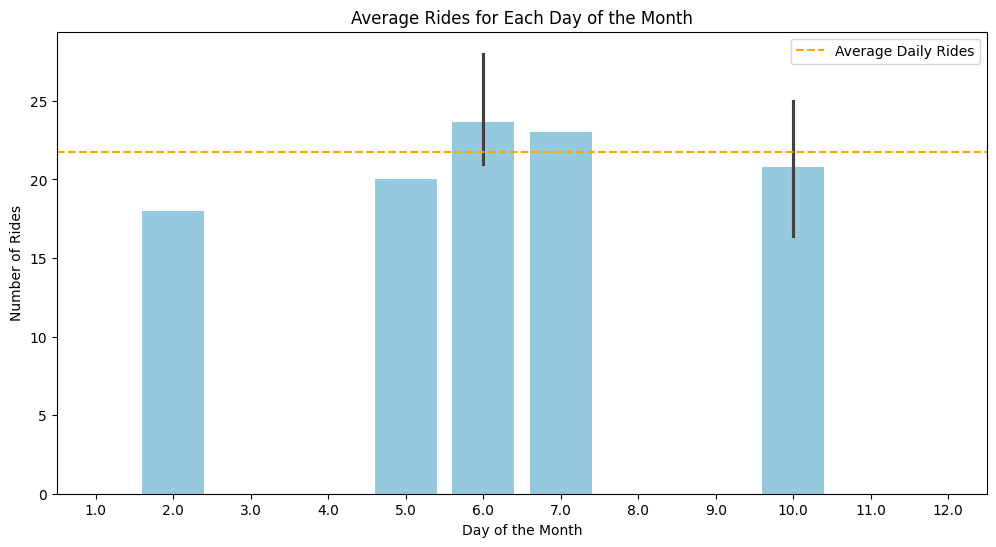

In [ ]:
# Convert 'START_DATE' to datetime
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Extract date from the start time
data['Date'] = data['START_DATE'].dt.date

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the average number of rides for each day of the month
average_rides_per_day = data.groupby(data['Date'].dt.day)['Date'].count().mean()

# Plot the average rides for each day of the month
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Date'].dt.day, y=data.groupby(data['Date'].dt.day)['Date'].count(), color='skyblue')
plt.axhline(y=average_rides_per_day, color='orange', linestyle='--', label='Average Daily Rides')
plt.title('Average Rides for Each Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

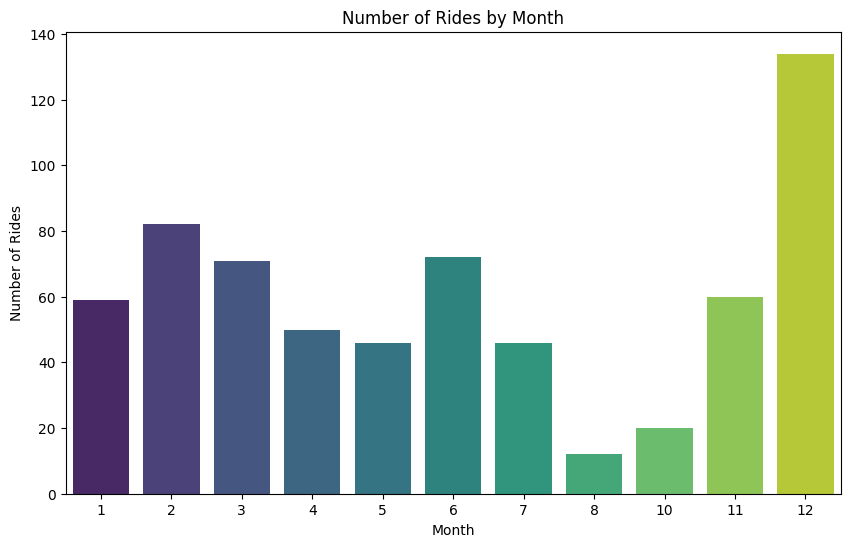

In [6]:
# Assuming 'START_DATE' is the column with datetime information
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Create a new column for the month
data['MONTH'] = data['START_DATE'].dt.month

# Plot the number of rides for each month
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=data, palette='viridis')
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()


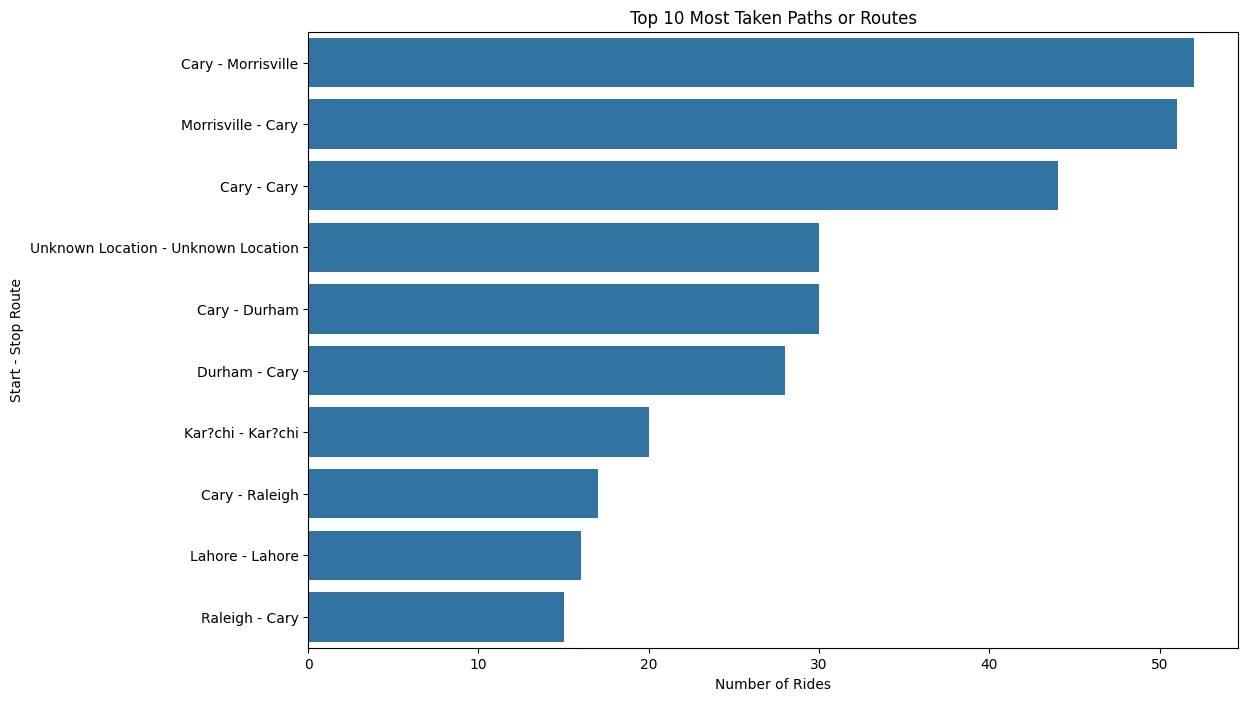

In [ ]:
8# Group by start and stop locations and count the number of occurrences
route_counts = data.groupby(['START', 'STOP']).size().reset_index(name='Count')

# Combine 'START' and 'STOP' columns into a new column 'Route'
route_counts['Route'] = route_counts['START'] + ' - ' + route_counts['STOP']

# Sort routes by count in descending order to find the most taken paths
most_taken_routes = route_counts.sort_values(by='Count', ascending=False)

# Plot the top N routes (adjust N as needed)
top_n = 10
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Route', data=most_taken_routes.head(top_n))
plt.title(f'Top {top_n} Most Taken Paths or Routes')
plt.xlabel('Number of Rides')
plt.ylabel('Start - Stop Route')
plt.show()

/tmp/ipykernel_732/1857854067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Stop Location', data=top_10_stops, palette='viridis')


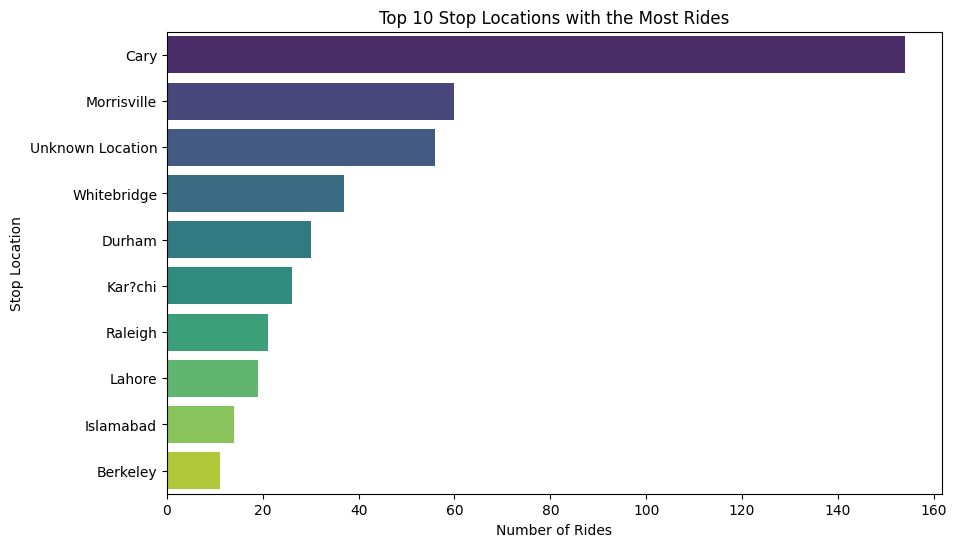

In [ ]:
# Count the number of occurrences for each stop location
stop_counts = data['STOP'].value_counts().reset_index(name='Count')

# Rename the columns for clarity
stop_counts.columns = ['Stop Location', 'Count']

# Sort stop locations by count in descending order
top_10_stops = stop_counts.sort_values(by='Count', ascending=False).head(10)

# Plot the top 10 stop locations
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Stop Location', data=top_10_stops, palette='viridis')

plt.title('Top 10 Stop Locations with the Most Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Stop Location')
plt.show()

/tmp/ipykernel_732/3031898722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='viridis')


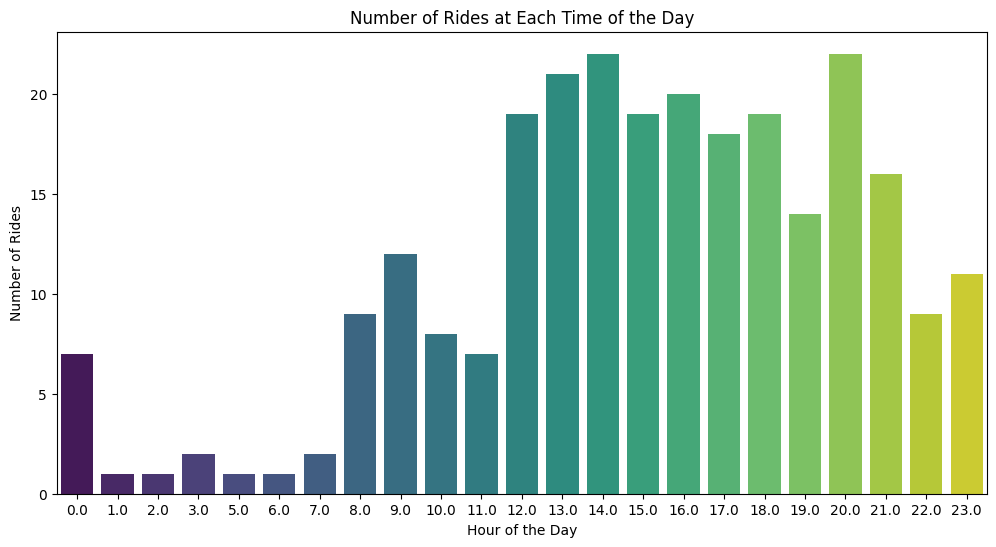

In [ ]:
# Convert 'START_DATE' to datetime
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Extract the hour from 'START_DATE'
data['Hour'] = data['START_DATE'].dt.hour

# Plot the number of rides at each time of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data, palette='viridis')
plt.title('Number of Rides at Each Time of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()







/tmp/ipykernel_732/2295248649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_Type', data=data, palette='Set2')


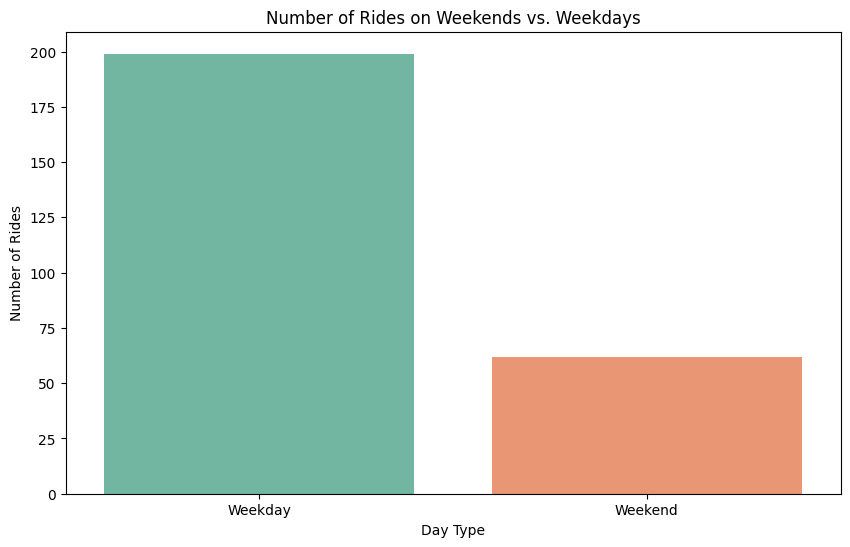

In [ ]:
# Convert 'START_DATE' to datetime
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Extract the day of the week from 'START_DATE'
data['Day_of_Week'] = data['START_DATE'].dt.day_name()

# Map weekdays and weekends
data['Day_Type'] = data['START_DATE'].dt.dayofweek.map({0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'})

# Plot the number of rides on weekends vs. weekdays
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_Type', data=data, palette='Set2')
plt.title('Number of Rides on Weekends vs. Weekdays')
plt.xlabel('Day Type')
plt.ylabel('Number of Rides')
plt.show()

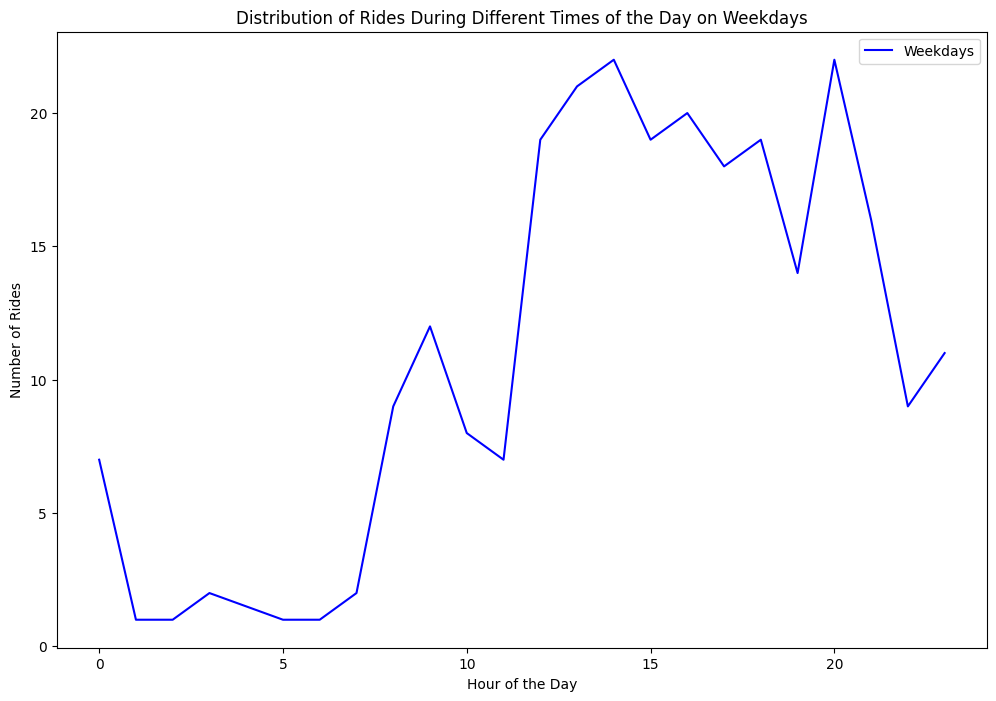

In [ ]:

data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Create a new column for the hour of the day
data['Hour'] = data['START_DATE'].dt.hour

# Map weekdays
data['Day_Type'] = data['START_DATE'].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

# Plot the distribution of rides during different times of the day for weekdays
plt.figure(figsize=(12, 8))
sns.lineplot(x=data[data['Day_Type'] != 'Weekend']['Hour'].value_counts().sort_index().index,
             y=data[data['Day_Type'] != 'Weekend']['Hour'].value_counts().sort_index().values,
             label='Weekdays', color='blue')

plt.title('Distribution of Rides During Different Times of the Day on Weekdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

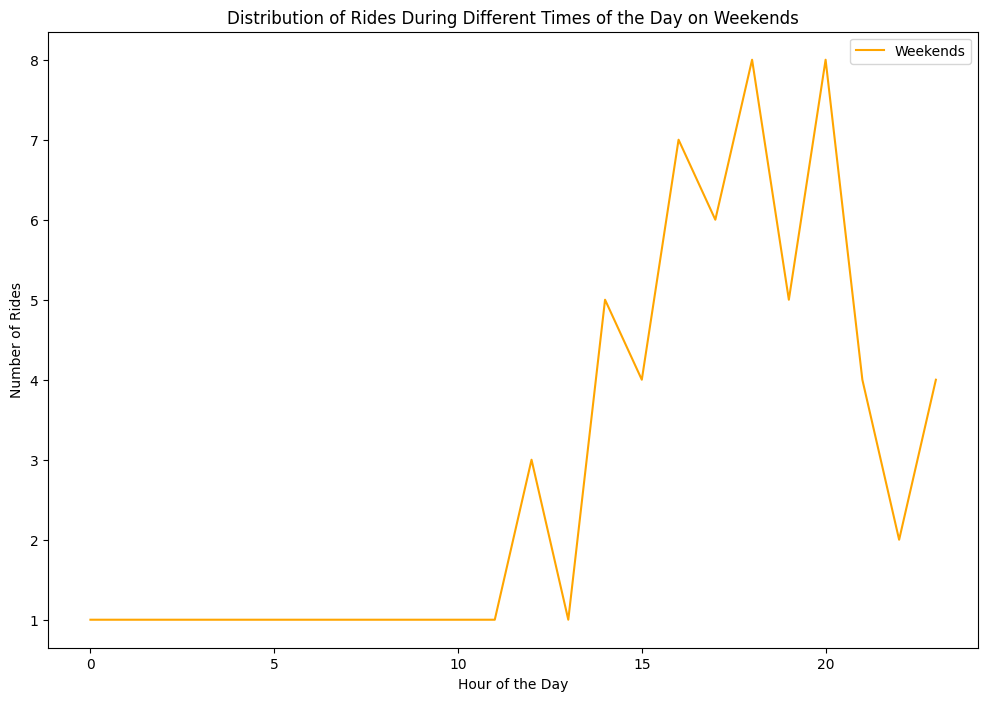

In [ ]:
# Map weekdays
data['Day_Type'] = data['START_DATE'].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Plot the distribution of rides during different times of the day for weekends
plt.figure(figsize=(12, 8))
sns.lineplot(x=data[data['Day_Type'].isin(['Saturday', 'Sunday'])]['Hour'].value_counts().sort_index().index,
             y=data[data['Day_Type'].isin(['Saturday', 'Sunday'])]['Hour'].value_counts().sort_index().values,
             label='Weekends', color='orange')

plt.title('Distribution of Rides During Different Times of the Day on Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()


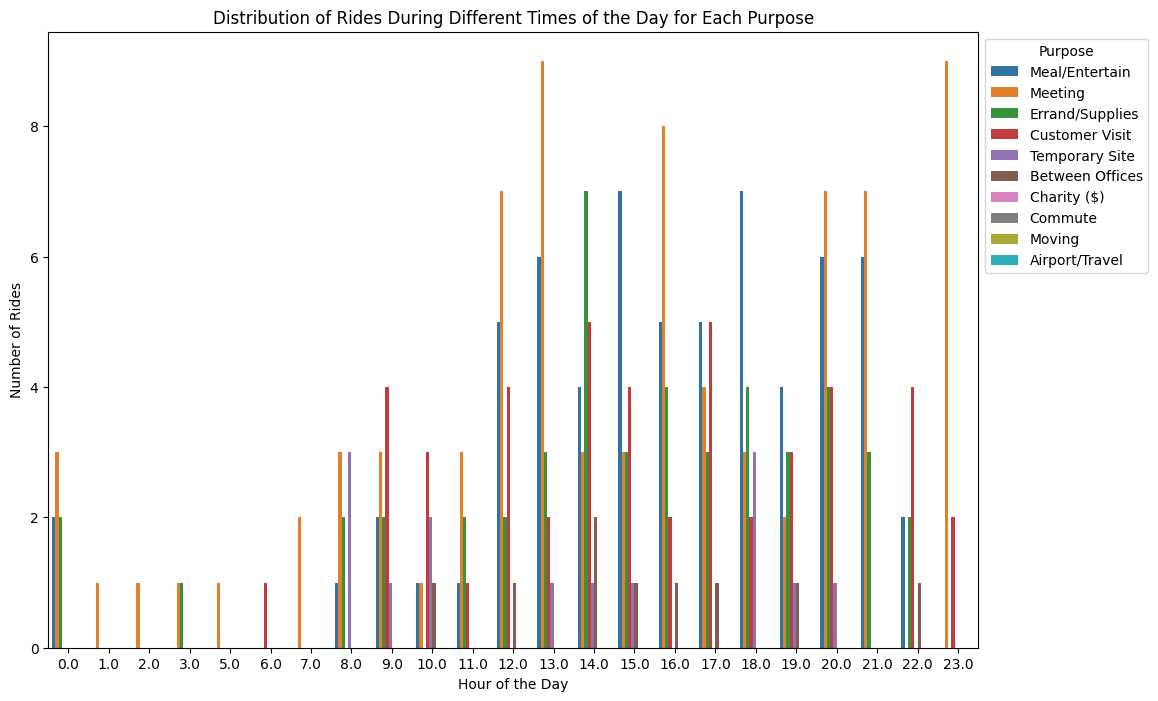

In [ ]:

data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Create a new column for the hour of the day
data['Hour'] = data['START_DATE'].dt.hour

# Map weekdays
data['Day_Type'] = data['START_DATE'].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Plot the distribution of rides during different times of the day for each purpose
plt.figure(figsize=(12, 8))
sns.countplot(x='Hour', hue='PURPOSE', data=data)
plt.title('Distribution of Rides During Different Times of the Day for Each Purpose')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.legend(title='Purpose', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


/tmp/ipykernel_732/741949783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MILES', y='PURPOSE', data=average_distance_by_purpose, palette='viridis')


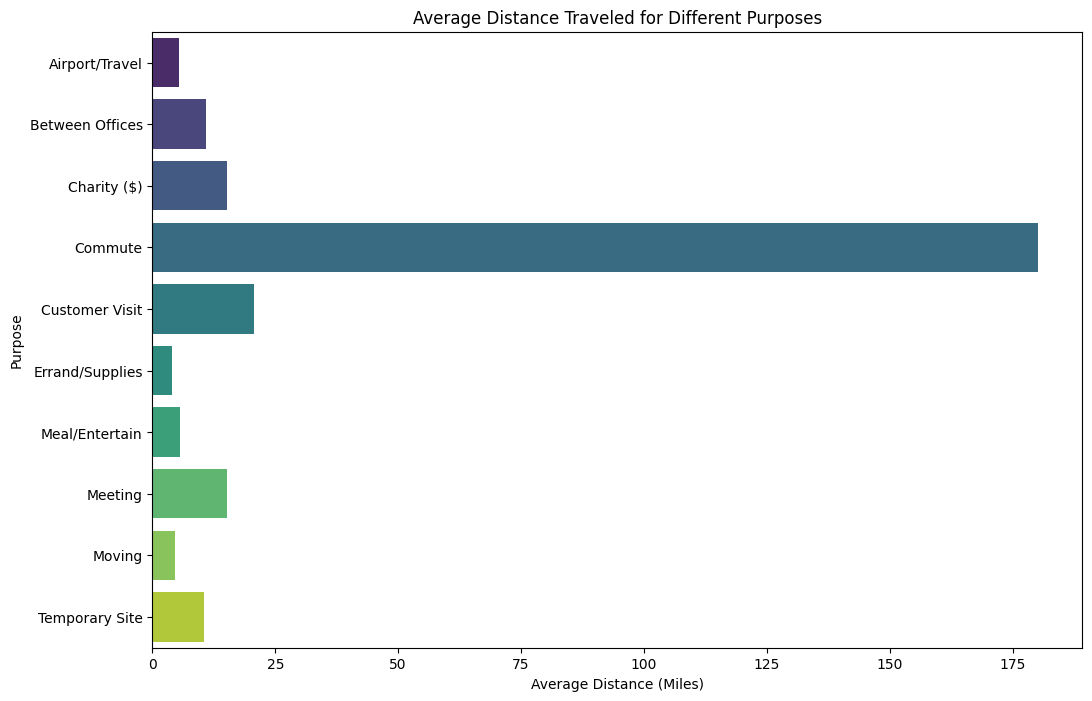

In [ ]:
average_distance_by_purpose = data.groupby('PURPOSE')['MILES'].mean().reset_index()

# Plot the average distance for each purpose
plt.figure(figsize=(12, 8))
sns.barplot(x='MILES', y='PURPOSE', data=average_distance_by_purpose, palette='viridis')
plt.title('Average Distance Traveled for Different Purposes')
plt.xlabel('Average Distance (Miles)')
plt.ylabel('Purpose')
plt.show()